# 04_01.Decision Tree(예측)

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#  *** 런타임 다시 시작

In [ ]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

## 3.데이터 전처리
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split

## 5.모델구축
from sklearn.tree import DecisionTreeRegressor, plot_tree # 결정 트리(예측)
# from sklearn.tree import DecisionTreeClassifier, plot_tree # 결정 트리(분류)

## 6.모델검정
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 7.최적화
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝

## 2.데이터 불러오기

### 2.1 구글 드라이브와 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2.2 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
housing_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/주택가격.csv', encoding="cp949")
housing_df.head()

,id,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,1,208500,8450,7,5,2003,2003,856,548,856,854,1,1,1
1,2,181500,9600,6,8,1976,1976,1262,460,1262,0,1,1,1
2,3,223500,11250,7,5,2001,2002,920,608,920,866,1,1,1
3,4,140000,9550,7,5,1915,1970,756,642,961,756,1,1,2
4,5,250000,14260,8,5,2000,2000,1145,836,1145,1053,1,1,1


### 2.3 자료구조 살펴보기

In [ ]:
housing_df.shape

In [ ]:
housing_df.info()

In [ ]:
housing_df.columns

## 3.데이터 전처리

### 3.1 필요없는 변수 제거

In [ ]:
housing_df = housing_df.drop (['id'], axis=1)
housing_df.head()

,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,208500,8450,7,5,2003,2003,856,548,856,854,1,1,1
1,181500,9600,6,8,1976,1976,1262,460,1262,0,1,1,1
2,223500,11250,7,5,2001,2002,920,608,920,866,1,1,1
3,140000,9550,7,5,1915,1970,756,642,961,756,1,1,2
4,250000,14260,8,5,2000,2000,1145,836,1145,1053,1,1,1


### 3.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [ ]:
housing_df['주거유형'] = housing_df['주거유형'].replace ([1,2,3,4,5], ['단독주택','2가구변경','듀플렉스','타운젠트바깥쪽','타운젠트안쪽'])
housing_df['판매유형'] = housing_df['판매유형'].replace ([1,2], ['보증증서','법원관리증서'])
housing_df['판매조건'] = housing_df['판매조건'].replace ([1,2], ['정상판매','압류및공매도'])
housing_df.head()

,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,208500,8450,7,5,2003,2003,856,548,856,854,단독주택,보증증서,정상판매
1,181500,9600,6,8,1976,1976,1262,460,1262,0,단독주택,보증증서,정상판매
2,223500,11250,7,5,2001,2002,920,608,920,866,단독주택,보증증서,정상판매
3,140000,9550,7,5,1915,1970,756,642,961,756,단독주택,보증증서,압류및공매도
4,250000,14260,8,5,2000,2000,1145,836,1145,1053,단독주택,보증증서,정상판매


## 4.데이터 탐색

### 4.1 EDA 데이터 탐색

In [ ]:
# 수치형 변수
housing_df.describe().round(2).T

In [ ]:
# 범주형 변수
# lecture_df.columns
categorical_features=['주거유형', '판매유형', '판매조건']

for col in categorical_features:
    cat = housing_df[col].value_counts()
    print(cat)

### 4.2 그래프 그리기

In [ ]:
# 한글 폰트 인식
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 수치형 변수
g = sns.pairplot(housing_df)

In [ ]:
# 변수별 선형회귀직선
variables = ['연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적',
             '차고면적', '면적_1층', '면적_2층']

for var in variables:
    plt.figure()
    sns.regplot(x = var, y = '가격', data = housing_df).set(title=f'{var} and 가격에 따른 회귀직선');

In [ ]:
# 범주형 변수
for col in categorical_features:
    sns.countplot(x=col, data = housing_df)
    plt.show()

### 4.3 base accuracy


In [ ]:
# base accuracy
housing_df['가격'].mean()

## 5.훈련/테스트용 데이터 분할


### 5.1 data와 target으로 분리
- data: X, target: y 로 분리

- X 추출


In [ ]:
X = housing_df.drop (['가격'], axis=1)
X.head()

,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,8450,7,5,2003,2003,856,548,856,854,단독주택,보증증서,정상판매
1,9600,6,8,1976,1976,1262,460,1262,0,단독주택,보증증서,정상판매
2,11250,7,5,2001,2002,920,608,920,866,단독주택,보증증서,정상판매
3,9550,7,5,1915,1970,756,642,961,756,단독주택,보증증서,압류및공매도
4,14260,8,5,2000,2000,1145,836,1145,1053,단독주택,보증증서,정상판매


- target(y) 추출
- y 값을 series에서 배열로 변환

In [ ]:
y = housing_df['가격']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: 가격, dtype: int64

### 5.2 훈련용 및 테스트용 데이터 분할
- test_size: 검증데이터 30%
- random_state : random seed 번호 = 1
- stratify : y(클래스)의 비율에 따라 분할(분류모형일때 사용)

In [ ]:
# \ 이후에 space 없어야 함
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 1)

In [ ]:
X_train.info()

In [ ]:
y_train.info()

In [ ]:
X_test.info()

In [ ]:
y_test.info()

## 6.pipeline으로 데이터 전처리
https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
- R에서 recipe
- 범주형 변수: OneHotEncoder
- 수치형 변수:
- 선형모델은 StandardScaler 로 표준화
- tree형 모델은 데이터 원형 사용

### 6.1 preprocess 세팅

In [ ]:
# pipeline으로 세팅
# 수치형 변수(y는 제외)
numeric_features = ['연면적', '품질', '상태', '건축년도', '리모델링년도',
                    '지하면적', '차고면적', '면적_1층', '면적_2층']

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')), # 누락된 값은 중앙값으로 처리
        #('scaler', StandardScaler())                # tree형 모델은 데이터 원형 사용
    ]
)

# 범주형 변수(y는 제외)
categorical_features=['주거유형', '판매유형', '판매조건']

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant',
                                  fill_value='missing')),  # 누락된 값은 missing으로 상수 처리
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# preprocessor로 데이터 변환 세팅
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적',
                                  '차고면적', '면적_1층', '면적_2층']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['주거유형', '판매유형', '판매조건'])])

### 6.2 데이터 전처리 결과 확인
- https://www.kaggle.com/code/thomasswain/titanic-classifier

In [ ]:
pd.DataFrame(preprocessor.fit_transform(X_train)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,7244.0,5.0,7.0,1970.0,1970.0,768.0,624.0,768.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,10921.0,4.0,5.0,1965.0,1965.0,960.0,432.0,960.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,9000.0,5.0,5.0,1974.0,1974.0,896.0,0.0,896.0,896.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2016.0,5.0,5.0,1970.0,1970.0,630.0,440.0,630.0,672.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,6240.0,5.0,4.0,1936.0,1950.0,896.0,240.0,896.0,448.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## 7.모델만들기 (모델 설정)
- R에서 workflow
- 예측모델: 000_reg
- 분류모델: 000_clf

### 7.1 pipeline으로 모델 연결

In [ ]:
dt_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("dt_reg", DecisionTreeRegressor())
    ]
)

### 7.2 하이퍼파라미터 세팅
- 그리드 서치를 사용한 머신 러닝 모델 세부 튜닝
- 기계학습 모델의 성능을 결정하는 하이퍼 파라미터 튜닝

In [ ]:
dt_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'dt_reg', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__keep_empty_features', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__imputer__verbose', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__cat__imputer', 'preprocessor__cat__encoder', 'preprocessor__cat__imputer__add_indicator', 'preprocessor__cat__imputer__copy', 'preprocessor__cat__imputer

In [ ]:
dt_grid = {
    "dt_reg__ccp_alpha" :np.logspace(-5,-3,3) ,     # [1.e-05, 1.e-04, 1.e-03]
    'dt_reg__max_depth': [1, 3, 5],
    'dt_reg__min_samples_leaf': [10, 30, 50],
}

dt_grid

{'dt_reg__ccp_alpha': array([1.e-05, 1.e-04, 1.e-03]),
 'dt_reg__max_depth': [1, 3, 5],
 'dt_reg__min_samples_leaf': [10, 30, 50]}

### 7.3 하이퍼파라미터 그리드 만들기

In [ ]:
dt_gs = GridSearchCV(estimator = dt_pipe,
                     param_grid = dt_grid,
                     scoring='r2',             # mse, r2
                     cv = 10,
                     n_jobs = -1,
                     verbose = 10,              # 프로세스 진행사항 확인
                     return_train_score = True) # 훈련결과 저장

## 8.모델 훈련(모델 학습)
- machine learning

### 8.1 모델 훈련하기(learning)

In [ ]:
dt_gs.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['연면적',
                                                                          '품질',
                                                                          '상태',
                                                                          '건축년도',
                                                                          '리모델링년도',
                                                                          '지하면적',
                                                                          '차고면적',
                                                                          '면적_1층',
                                                                          '면적_2층']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['주거유형',
                                                                          '판매유형',
                                                                          '판매조건'])])),
                                       ('dt_reg', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'dt_reg__ccp_alpha': array([1.e-05, 1.e-04, 1.e-03]),
                         'dt_reg__max_depth': [1, 3, 5],
                         'dt_reg__min_samples_leaf': [10, 30, 50]},
             return_train_score=True, scoring='r2', verbose=10)

### 8.2 검증 곡선으로 Tuning 결과 확인
- 결과 표로 정리: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#sphx-glr-auto-examples-model-selection-plot-grid-search-stats-py
- 그래프로 정리: https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv

In [ ]:
# 결과확인
dt_gs.cv_results_

{'mean_fit_time': array([0.01679149, 0.01581292, 0.01688607, 0.01662257, 0.01584206,
        0.01555793, 0.01710365, 0.01545825, 0.01568577, 0.01536875,
        0.01638849, 0.01641748, 0.01463642, 0.01887724, 0.01531906,
        0.01574481, 0.01513925, 0.01584489, 0.01454332, 0.01560078,
        0.01586258, 0.01756732, 0.025087  , 0.02681792, 0.02574646,
        0.03013322, 0.03163469]),
 'std_fit_time': array([0.00309   , 0.00181397, 0.00372994, 0.00298566, 0.00214222,
        0.00223237, 0.00244822, 0.0012477 , 0.00309265, 0.00181503,
        0.00358114, 0.00603508, 0.00057501, 0.00565906, 0.00106699,
        0.000658  , 0.00047908, 0.00255536, 0.00154851, 0.00490568,
        0.00524082, 0.00469364, 0.00605074, 0.00784695, 0.00542991,
        0.00300699, 0.00783962]),
 'mean_score_time': array([0.00657239, 0.00685642, 0.00860894, 0.00657597, 0.00797436,
        0.00636399, 0.00614562, 0.0072993 , 0.00718584, 0.00668056,
        0.00846033, 0.00631986, 0.00631232, 0.00632315, 0.006064

In [ ]:
# 분석결과를 표로 정리
results_df = pd.DataFrame(dt_gs.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
0.001_5_10,"{'dt_reg__ccp_alpha': 0.001, 'dt_reg__max_dept...",1,0.728249,0.060715
1e-05_5_10,"{'dt_reg__ccp_alpha': 1e-05, 'dt_reg__max_dept...",1,0.728249,0.060715
0.0001_5_10,"{'dt_reg__ccp_alpha': 0.0001, 'dt_reg__max_dep...",3,0.728172,0.060663
1e-05_5_30,"{'dt_reg__ccp_alpha': 1e-05, 'dt_reg__max_dept...",4,0.704907,0.059036
0.0001_5_30,"{'dt_reg__ccp_alpha': 0.0001, 'dt_reg__max_dep...",4,0.704907,0.059036
0.001_5_30,"{'dt_reg__ccp_alpha': 0.001, 'dt_reg__max_dept...",4,0.704907,0.059036
0.001_5_50,"{'dt_reg__ccp_alpha': 0.001, 'dt_reg__max_dept...",7,0.670305,0.066157
0.0001_5_50,"{'dt_reg__ccp_alpha': 0.0001, 'dt_reg__max_dep...",7,0.670305,0.066157
1e-05_5_50,"{'dt_reg__ccp_alpha': 1e-05, 'dt_reg__max_dept...",7,0.670305,0.066157


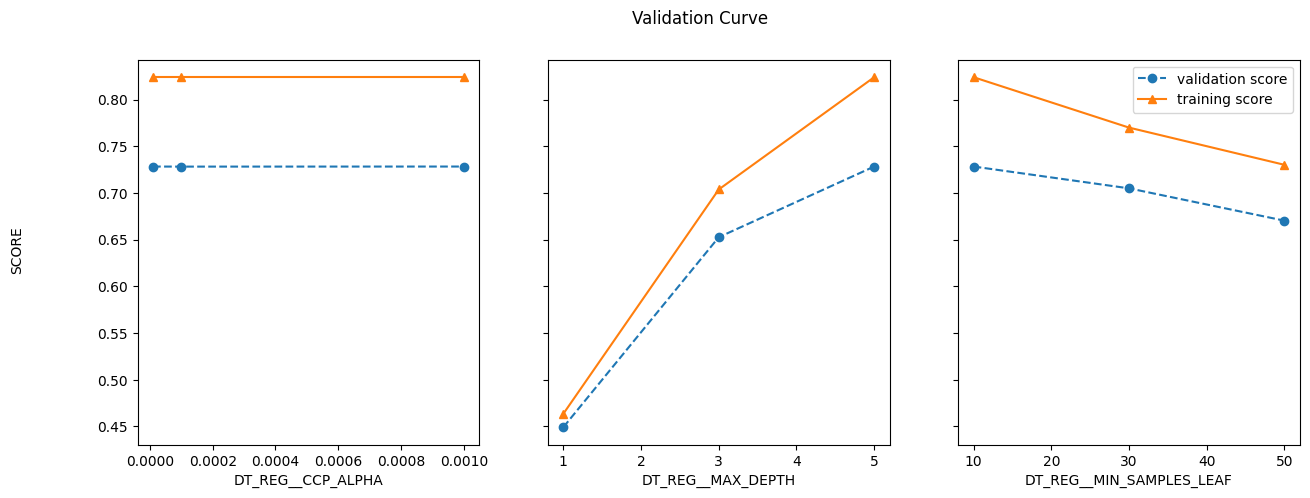

In [ ]:
# 튜닝결과 그래프
# 파라미터값이 ( , )로 되어 있어서 그래프로 구현 못함

results = dt_gs.cv_results_
means_test = results['mean_test_score']
means_train = results['mean_train_score']

masks = []
masks_names = list(dt_gs.best_params_.keys())
for p_k, p_v in dt_gs.best_params_.items():
    masks.append(list(results['param_'+p_k].data==p_v))

params = dt_gs.param_grid

fig, ax = plt.subplots(1,len(params),
                       sharex='none',
                       sharey='all',
                       figsize=(15,5))
fig.suptitle('Validation Curve')
fig.text(0.04, 0.5, 'SCORE', va='center', rotation='vertical')
pram_preformace_in_best = {}

for i, p in enumerate(masks_names):
    m = np.stack(masks[:i] + masks[i+1:])
    pram_preformace_in_best
    best_parms_mask = m.all(axis=0)
    best_index = np.where(best_parms_mask)[0]
    x = np.array(params[p])
    y_1 = np.array(means_test[best_index])
    y_2 = np.array(means_train[best_index])
    ax[i].errorbar(x, y_1, linestyle='--', marker='o', label='validation score')
    ax[i].errorbar(x, y_2, linestyle='-', marker='^',label='training score' )
    ax[i].set_xlabel(p.upper())

plt.legend()
plt.show()

### 8.3 best 모델 설정

In [ ]:
# best 모델 파라미터 확인
print(dt_gs.best_score_)
print(dt_gs.best_params_)

0.7282489422668224
{'dt_reg__ccp_alpha': 1e-05, 'dt_reg__max_depth': 5, 'dt_reg__min_samples_leaf': 10}


In [ ]:
# best 모델 파라미터를 최종모델로 훈련
best_reg = dt_gs.best_estimator_
best_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['연면적', '품질', '상태', '건축년도',
                                                   '리모델링년도', '지하면적', '차고면적',
                                                   '면적_1층', '면적_2층']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['주거유형', '판매유형', '판매조건'])])),
                ('dt_reg',
                 DecisionTreeRegressor(ccp_alpha=1e-05, max_depth=5,
                                       min_samples_leaf=10))])

In [ ]:
print(best_reg['dt_reg'])

DecisionTreeRegressor(ccp_alpha=1e-05, max_depth=5, min_samples_leaf=10)


### 8.4 중요변수확인

In [ ]:
# 중요도 점수 계산
# tree 모형은 .coef -> .feature_importances_ 로 수정

feature = best_reg['preprocessor'].get_feature_names_out()   # 수정
importances = best_reg["dt_reg"].feature_importances_        # 수정
importances = importances.flatten()                          # flatten() - 다차원 array를 1차원 array로 변환
output = pd.DataFrame([feature , importances],
                      index = ["feature","importances"]).T
output.sort_values(["importances"],
                   ascending= False ,
                   inplace=True)

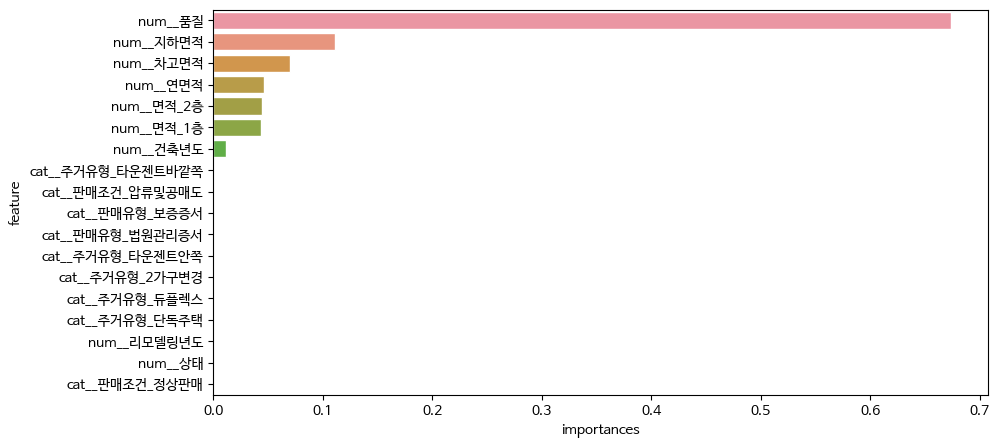

In [ ]:
# 그래프 그리기

plt.rc('font', family='NanumBarunGothic')

fig ,ax = plt.subplots(figsize=(10, 5))
sns.set(font_scale = 1)
ax = sns.barplot(y="feature", x="importances", data=output)
plt.show()

### 8.5 훈련 결과 DT 확인

In [ ]:
# feature name 설정
feature_names = feature.tolist()      # list 형태로 수정

print(feature_names)

['num__연면적', 'num__품질', 'num__상태', 'num__건축년도', 'num__리모델링년도', 'num__지하면적', 'num__차고면적', 'num__면적_1층', 'num__면적_2층', 'cat__주거유형_2가구변경', 'cat__주거유형_단독주택', 'cat__주거유형_듀플렉스', 'cat__주거유형_타운젠트바깥쪽', 'cat__주거유형_타운젠트안쪽', 'cat__판매유형_법원관리증서', 'cat__판매유형_보증증서', 'cat__판매조건_압류및공매도', 'cat__판매조건_정상판매']


In [ ]:
from sklearn.tree import export_text

r = export_text(best_reg["dt_reg"],
                feature_names = feature_names)  # list 형태로 수정
print(r)

|--- num__품질 <= 6.50
|   |--- num__품질 <= 5.50
|   |   |--- num__면적_1층 <= 1049.00
|   |   |   |--- num__품질 <= 4.50
|   |   |   |   |--- num__차고면적 <= 227.00
|   |   |   |   |   |--- value: [75023.68]
|   |   |   |   |--- num__차고면적 >  227.00
|   |   |   |   |   |--- value: [102959.04]
|   |   |   |--- num__품질 >  4.50
|   |   |   |   |--- num__연면적 <= 6501.00
|   |   |   |   |   |--- value: [105958.61]
|   |   |   |   |--- num__연면적 >  6501.00
|   |   |   |   |   |--- value: [127707.70]
|   |   |--- num__면적_1층 >  1049.00
|   |   |   |--- num__지하면적 <= 1152.00
|   |   |   |   |--- num__건축년도 <= 1956.50
|   |   |   |   |   |--- value: [122650.96]
|   |   |   |   |--- num__건축년도 >  1956.50
|   |   |   |   |   |--- value: [144706.16]
|   |   |   |--- num__지하면적 >  1152.00
|   |   |   |   |--- num__연면적 <= 9293.00
|   |   |   |   |   |--- value: [142490.00]
|   |   |   |   |--- num__연면적 >  9293.00
|   |   |   |   |   |--- value: [165955.56]
|   |--- num__품질 >  5.50
|   |   |--- num__차고면적 <= 362.00
|  

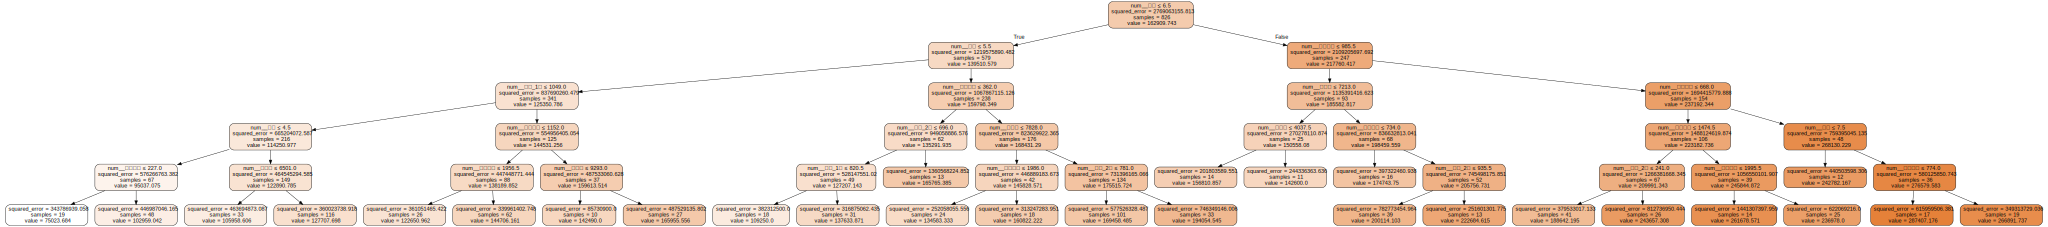

In [ ]:
# Decision tree 그래프로 확인
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(best_reg["dt_reg"],
                                out_file=None,
                                feature_names = feature_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

## 9.모델 test 및 검정

### 9.1 검증용 데이터로 예측
- predict (class로 표시)
- predict_proba (확률값으로 표시): 분류모델에서 사용

In [ ]:
y_pred = best_reg.predict(X_test) # dt_reg -> dt_pipe
y_pred

array([200114.1025641 , 122650.96153846, 102959.04166667, 243657.30769231,
       160822.22222222, 169458.48514851, 127707.69827586, 127707.69827586,
       127707.69827586, 160822.22222222, 142490.        , 160822.22222222,
       137633.87096774, 160822.22222222, 127707.69827586, 137633.87096774,
       169458.48514851, 165955.55555556, 134583.33333333, 137633.87096774,
       127707.69827586, 156810.85714286, 160822.22222222, 222684.61538462,
       261678.57142857, 261678.57142857, 134583.33333333, 102959.04166667,
       200114.1025641 , 105958.60606061, 122650.96153846, 127707.69827586,
       127707.69827586, 200114.1025641 , 236978.        , 236978.        ,
       243657.30769231, 165955.55555556, 222684.61538462, 194054.54545455,
       169458.48514851, 165955.55555556, 200114.1025641 , 127707.69827586,
       242782.16666667, 109250.        , 127707.69827586, 144706.16129032,
       200114.1025641 , 122650.96153846, 200114.1025641 , 127707.69827586,
       188642.19512195, 1

### 9.2 실제값과 예측값 확인

In [ ]:
output = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
output

,Actual,Predicted
660,237000,200114.102564
548,108480,122650.961538
1063,72500,102959.041667
321,241000,243657.307692
1055,179200,160822.222222
...,...,...
56,226000,188642.195122
594,265979,242782.166667
1131,193000,160822.222222
54,219500,243657.307692


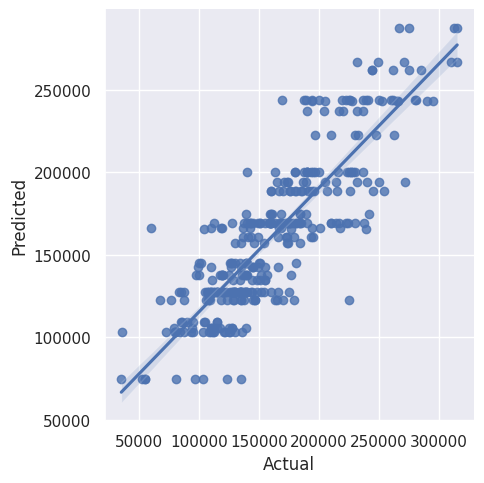

In [ ]:
sns.lmplot(x ='Actual', y ='Predicted', data = output)

### 9.3 모델 검정

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
print('MSE: %.3f' % mean_squared_error(y_test,y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test,y_pred))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2: %.3f' % r2_score(y_test,y_pred))

MSE: 747911170.969
MAE: 21124.281
RMSE: 27347.965
R2: 0.735
